In [1]:
# Goal: Use PCA to reduce the 64-dimensional handwritten digit data to 2D, and visualize class separability

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
print("Original shape of data:", X.shape)

Original shape of data: (1797, 64)


In [4]:
# apply PCA
from sklearn.decomposition import PCA

In [5]:
# reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Reduced shape of data:", X_pca.shape)

Reduced shape of data: (1797, 2)


In [6]:
# visualize in 2D

In [7]:
# convert dataframe for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
pca_df['label'] = y

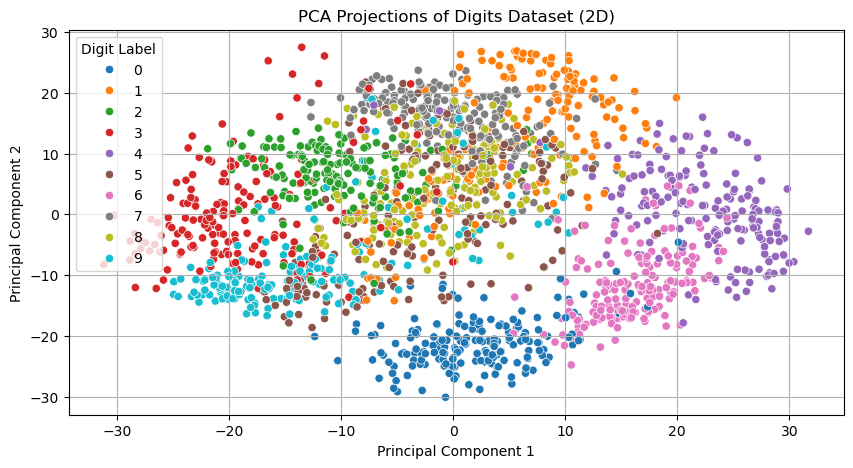

In [8]:
# plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='tab10', legend='full')
plt.title('PCA Projections of Digits Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit Label')
plt.grid(True)
plt.show()

In [9]:
# explained variance

In [10]:
# show how much variance is explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.14890594 0.13618771]


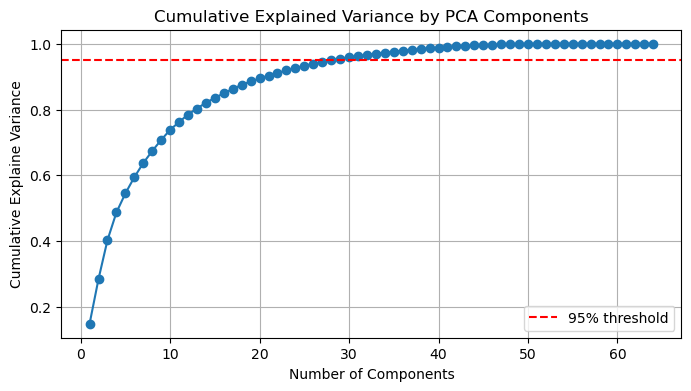

In [11]:
# plot cumulative explained variance
pca_full = PCA().fit(X)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explaine Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.grid(True)
plt.legend()
plt.show()